<a href="https://colab.research.google.com/github/e-c-centric/Group26_SportsPrediction/blob/main/Group26_SportsPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the necessary libraries



In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [48]:
from google.colab import drive
drive.mount('/content/drive')
DatasetFifa21 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/players_21.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data Preprocessing**

In [49]:
DatasetFifa21.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,103500000.0,560000.0,33,...,52+3,52+3,52+3,62+3,19+3,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,92,63000000.0,220000.0,35,...,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,91,91,111000000.0,240000.0,31,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/21_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,NaN,https://cdn.sofifa.net/flags/pl.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,132000000.0,270000.0,28,...,49+3,49+3,49+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/21_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CAM, CM",91,91,129000000.0,370000.0,29,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/21_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [50]:
DatasetFifa21.tail()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
18939,257710,https://sofifa.com/player/257710/mengxuan-zhan...,Zhang Mengxuan,张梦炫,CB,47,52,70000.0,1000.0,21,...,47+2,47+2,47+2,45+2,15+2,https://cdn.sofifa.net/players/257/710/21_120.png,https://cdn.sofifa.net/teams/112165/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
18940,257933,https://sofifa.com/player/257933/wenzhuo-huang...,Huang Wenzhou,黄文卓,CM,47,53,70000.0,1000.0,21,...,46+2,46+2,46+2,47+2,15+2,https://cdn.sofifa.net/players/257/933/21_120.png,https://cdn.sofifa.net/teams/112540/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
18941,257936,https://sofifa.com/player/257936/yue-song/210002,Song Yue,宋岳,CM,47,47,45000.0,2000.0,28,...,46+1,46+1,46+1,47,11+2,https://cdn.sofifa.net/players/257/936/21_120.png,https://cdn.sofifa.net/teams/111774/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
18942,258736,https://sofifa.com/player/258736/vani-da-silva...,V. Da Silva,Ivanilson Loforte Tique Da Silva,ST,47,67,130000.0,500.0,17,...,26+2,26+2,26+2,33+2,14+2,https://cdn.sofifa.net/players/258/736/21_120.png,https://cdn.sofifa.net/teams/1920/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/gb-eng.png
18943,258760,https://sofifa.com/player/258760/ben-hough/210002,B. Hough,Ben Hough,CM,47,67,130000.0,500.0,17,...,41+2,41+2,41+2,43+2,14+2,https://cdn.sofifa.net/players/258/760/21_120.png,https://cdn.sofifa.net/teams/1920/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/gb-eng.png


In [51]:
DatasetFifa21.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,18944.000000,18944.000000,18944.000000,1.870700e+04,18719.000000,18944.000000,18944.000000,18944.000000,18719.000000,18719.000000,...,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,2083.000000
mean,226232.328917,65.677787,71.086729,2.902288e+06,9148.482825,25.225823,181.190773,75.016892,47908.905551,1.355468,...,57.978674,46.470017,47.581767,45.546505,16.446052,16.236486,16.103357,16.225982,16.551309,37.203553
std,27166.574284,7.002278,6.109985,7.743775e+06,19893.149956,4.697354,6.825672,7.057140,53906.733776,0.739015,...,12.118390,20.169591,21.402461,20.953997,17.577332,16.845480,16.519399,17.017341,17.878121,10.714523
min,41.000000,47.000000,47.000000,9.000000e+03,500.000000,16.000000,155.000000,50.000000,1.000000,1.000000,...,12.000000,3.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000
25%,210028.750000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,461.000000,1.000000,...,50.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,28.000000
50%,232301.500000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1913.000000,1.000000,...,59.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,37.000000
75%,246745.750000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,110986.000000,1.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,258970.000000,93.000000,95.000000,1.855000e+08,560000.000000,53.000000,206.000000,110.000000,114899.000000,4.000000,...,96.000000,94.000000,93.000000,90.000000,90.000000,92.000000,93.000000,91.000000,90.000000,65.000000


In [52]:
DatasetFifa21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 15.9+ MB


Viewing all the column labels to be able to select the relevant columns

In [53]:
DatasetFifa21.columns.tolist()

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'player_positions',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'club_team_id',
 'club_name',
 'league_name',
 'league_level',
 'club_position',
 'club_jersey_number',
 'club_loaned_from',
 'club_joined',
 'club_contract_valid_until',
 'nationality_id',
 'nationality_name',
 'nation_team_id',
 'nation_position',
 'nation_jersey_number',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'player_traits',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agi

Some column in the dataset are obviously irrelevant to a player's rating, for example, their image, or the flag of the country. As such, we drop the columns that are immediately evidently irrelevant to a player's overall rating.


In [54]:
irrelevant_columns = ['sofifa_id', 'player_url', 'player_face_url', 'club_logo_url', 'club_flag_url', 'nation_logo_url', 'nation_flag_url','dob',
                      'potential', 'club_team_id',	'club_name',	'league_name']
DatasetFifa21.drop(columns=irrelevant_columns, inplace=True)

In [55]:
DatasetFifa21

,short_name,long_name,player_positions,overall,value_eur,wage_eur,age,height_cm,weight_kg,league_level,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,103500000.0,560000.0,33,170,72,1.0,...,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,19+3
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,63000000.0,220000.0,35,187,83,1.0,...,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,20+3
2,R. Lewandowski,Robert Lewandowski,ST,91,111000000.0,240000.0,31,184,80,1.0,...,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
3,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,132000000.0,270000.0,28,175,68,1.0,...,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3,20+3
4,K. De Bruyne,Kevin De Bruyne,"CAM, CM",91,129000000.0,370000.0,29,181,70,1.0,...,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,Zhang Mengxuan,张梦炫,CB,47,70000.0,1000.0,21,177,70,1.0,...,41+2,41+2,41+2,42+2,45+2,47+2,47+2,47+2,45+2,15+2
18940,Huang Wenzhou,黄文卓,CM,47,70000.0,1000.0,21,174,68,1.0,...,48+2,48+2,48+2,47+2,47+2,46+2,46+2,46+2,47+2,15+2
18941,Song Yue,宋岳,CM,47,45000.0,2000.0,28,185,79,1.0,...,47,47,47,47,47,46+1,46+1,46+1,47,11+2
18942,V. Da Silva,Ivanilson Loforte Tique Da Silva,ST,47,130000.0,500.0,17,171,58,4.0,...,32+2,32+2,32+2,35+2,33+2,26+2,26+2,26+2,33+2,14+2


A player's BMI might impact their performance in training, and consequently, actual football games. A player's BMI might also afect their lower body joints (wear and tear), which would also affect their game availability. As such, we aggregate players' heights and weights into a BMI attribute, and then we categorize them. This should allow us see if there is colleration between players' overall rating and their BMI.

In [56]:
def categorize_bmi(bmi):
    '''This method categorizes a players BMI into one of three categories: underweight, balanced, overweight
    The benchmarks used were sourced from https://sportsmanist.com/how-much-should-a-soccer-player-weigh and
    https://ids-water.com/2021/04/29/what-is-a-good-bmi-for-a-soccer-player/'''
    if bmi < 18.5:
        return 'Underweight'
    elif 20 <= bmi < 24.9:
        return 'Balanced'
    else:
        return 'Overweight'

In [57]:
#Creating a BMI column that contains players' BMIs calculated using each player's height and weight
height_meters = DatasetFifa21['height_cm'] / 100
DatasetFifa21['bmi'] = DatasetFifa21['weight_kg'] / (height_meters ** 2)

In [58]:
#Applying the categorize_bmi function to each player's BMI and creating a new column that contains the category
DatasetFifa21['bmi_category'] = DatasetFifa21['bmi'].apply(categorize_bmi)

In [59]:
non_goalkeeper_df = DatasetFifa21.copy()

In [60]:
selected_features_non_gk = [
    'short_name', 'long_name', 'league_level', 'weak_foot', 'skill_moves', 'international_reputation',
    'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
    'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
    'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve',
    'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
    'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
    'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping',
    'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression',
    'mentality_interceptions', 'mentality_positioning', 'mentality_vision',
    'mentality_penalties', 'mentality_composure', 'defending_marking_awareness',
    'defending_standing_tackle', 'defending_sliding_tackle','bmi_category', 'value_eur',
    'wage_eur', 'release_clause_eur', 'goalkeeping_diving',
    'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning',
    'goalkeeping_reflexes', 'goalkeeping_speed','age','overall'
]

In [61]:
data = non_goalkeeper_df[selected_features_non_gk].copy()

Replacing all NAs with the mean pf the column so they do not significantly impact calculations in later kernels. From inspection, the rows in the relevant columns that contain missing values are rows that contain numerical data so the mean of the column would not significantly impact calculations.

In [62]:
data.isnull().sum()

short_name                         0
long_name                          0
league_level                     225
weak_foot                          0
skill_moves                        0
international_reputation           0
pace                            2083
shooting                        2083
passing                         2083
dribbling                       2083
defending                       2083
physic                          2083
attacking_crossing                 0
attacking_finishing                0
attacking_heading_accuracy         0
attacking_short_passing            0
attacking_volleys                  0
skill_dribbling                    0
skill_curve                        0
skill_fk_accuracy                  0
skill_long_passing                 0
skill_ball_control                 0
movement_acceleration              0
movement_sprint_speed              0
movement_agility                   0
movement_reactions                 0
movement_balance                   0
p

In [63]:
mean = data['value_eur'].mean()
data['value_eur'].fillna(mean, inplace = True)

In [64]:
mean = data['release_clause_eur'].mean()
data['release_clause_eur'].fillna(mean, inplace = True)

In [65]:
mean = data['wage_eur'].mean()
data['wage_eur'].fillna(mean, inplace = True)

In [66]:
mean = data['league_level'].mean()
data['league_level'].fillna(mean, inplace = True)

In [67]:
mean = data['pace'].mean()
data['pace'].fillna(mean, inplace = True)

In [68]:
mean = data['shooting'].mean()
data['shooting'].fillna(mean, inplace = True)

In [69]:
mean = data['passing'].mean()
data['passing'].fillna(mean, inplace = True)

In [70]:
mean = data['dribbling'].mean()
data['dribbling'].fillna(mean, inplace = True)

In [71]:
mean = data['defending'].mean()
data['defending'].fillna(mean, inplace = True)

In [72]:
mean = data['physic'].mean()
data['physic'].fillna(mean, inplace = True)

In [73]:
data.head()

,short_name,long_name,league_level,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,...,wage_eur,release_clause_eur,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,age,overall
0,L. Messi,Lionel Andrés Messi Cuccittini,1.0,4,4,5,85.0,92.0,91.0,95.0,...,560000.0,138400000.0,6,11,15,14,8,NaN,33,93
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,1.0,4,5,5,89.0,93.0,81.0,89.0,...,220000.0,75900000.0,7,11,15,14,11,NaN,35,92
2,R. Lewandowski,Robert Lewandowski,1.0,4,4,4,78.0,91.0,78.0,85.0,...,240000.0,132000000.0,15,6,12,8,10,NaN,31,91
3,Neymar Jr,Neymar da Silva Santos Júnior,1.0,5,5,5,91.0,85.0,86.0,94.0,...,270000.0,166500000.0,9,9,15,15,11,NaN,28,91
4,K. De Bruyne,Kevin De Bruyne,1.0,5,4,4,76.0,86.0,93.0,88.0,...,370000.0,161000000.0,15,13,5,10,13,NaN,29,91


In [74]:
data.tail()

,short_name,long_name,league_level,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,...,wage_eur,release_clause_eur,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,age,overall
18939,Zhang Mengxuan,张梦炫,1.0,2,2,1,58.0,23.0,26.0,27.0,...,1000.0,57000.0,12,13,8,14,6,NaN,21,47
18940,Huang Wenzhou,黄文卓,1.0,2,2,1,58.0,32.0,49.0,47.0,...,1000.0,72000.0,8,8,13,14,10,NaN,21,47
18941,Song Yue,宋岳,1.0,2,2,1,65.0,37.0,49.0,46.0,...,2000.0,47000.0,8,5,11,5,7,NaN,28,47
18942,V. Da Silva,Ivanilson Loforte Tique Da Silva,4.0,2,2,1,70.0,46.0,40.0,53.0,...,500.0,165000.0,11,13,9,9,6,NaN,17,47
18943,B. Hough,Ben Hough,4.0,2,2,1,64.0,40.0,48.0,49.0,...,500.0,165000.0,12,10,9,6,8,NaN,17,47


In [75]:
data.columns.tolist()

['short_name',
 'long_name',
 'league_level',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking_awareness',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'bmi_category',
 'value_eur',
 'wage_eur',
 'release_clause_eur',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking'

In [76]:
print(data.isnull().sum(), "\n\n")

short_name                         0
long_name                          0
league_level                       0
weak_foot                          0
skill_moves                        0
international_reputation           0
pace                               0
shooting                           0
passing                            0
dribbling                          0
defending                          0
physic                             0
attacking_crossing                 0
attacking_finishing                0
attacking_heading_accuracy         0
attacking_short_passing            0
attacking_volleys                  0
skill_dribbling                    0
skill_curve                        0
skill_fk_accuracy                  0
skill_long_passing                 0
skill_ball_control                 0
movement_acceleration              0
movement_sprint_speed              0
movement_agility                   0
movement_reactions                 0
movement_balance                   0
p

In [77]:
#creating an independent variable subset by creating a copy of the dataframe and
#dropping the dependent variables from the dataset.

independent_variables = data.drop(columns=['overall', 'short_name', 'long_name','goalkeeping_speed'])

#extracting the target variable so that we can run a correlation study on the independent
#variables and the overall rating to find out which has the greatest correlation.
dependent_variable = data['overall']

In [78]:
correlation_matrix = independent_variables.corrwith(dependent_variable)

#sorting the correlations from the correlation matrix in descending
#so that we can select the features with highest correlations. The correlations are also plotted
#on a bar graph.

sorted_correlations = correlation_matrix.abs().sort_values(ascending=False)

<ipython-input-78-68c4178b6591>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = independent_variables.corrwith(dependent_variable)


In [79]:
#selecting the top 16 features with the highest correlation
#this figure was arrived at by experimentation

n_top_features = 13
top_features = sorted_correlations[:n_top_features]

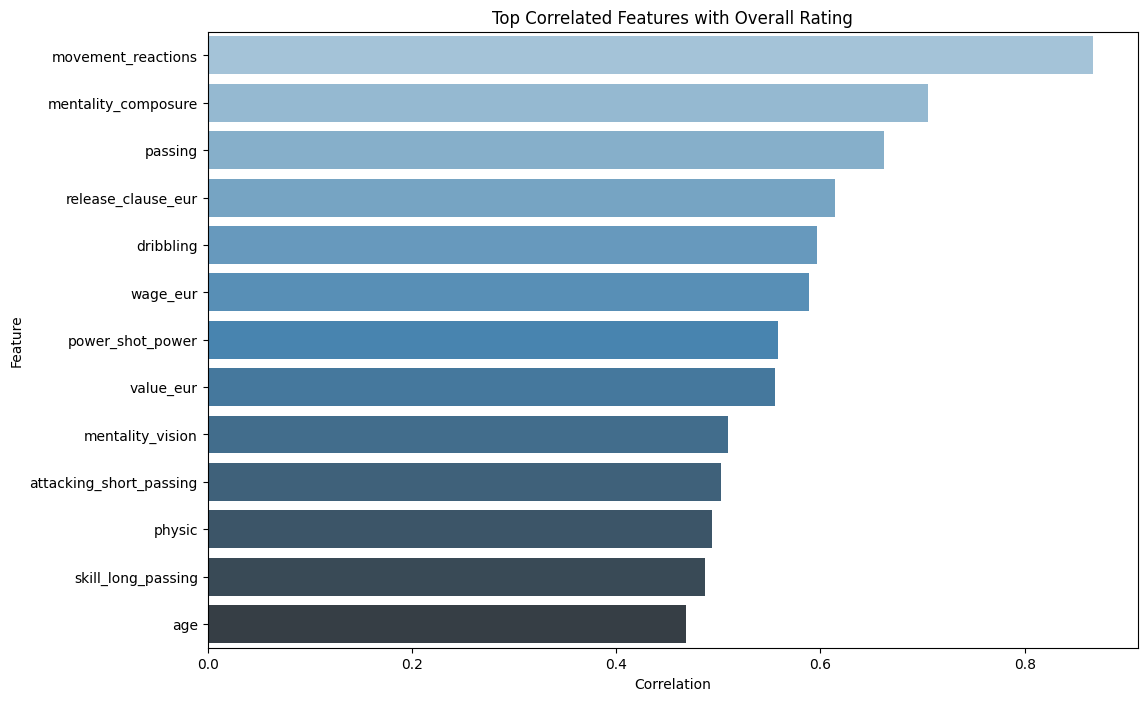

In [80]:
# Visualize the top correlated features
plt.figure(figsize=(12, 8))
sns.barplot(x=top_features, y=top_features.index, palette="Blues_d")
plt.title("Top Correlated Features with Overall Rating")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.show()

In [81]:
#creating a feature subset using the top correlated features
feature_subsets = data[top_features.index]

#scaling the independent variables
scaler = StandardScaler()
scaled_features = scaler.fit_transform(feature_subsets)

In [82]:
#creating a DataFrame with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=feature_subsets.columns)

scaled_df.reset_index(drop=True, inplace=True)
dependent_variable.reset_index(drop=True, inplace=True)

#concatenating the scaled features with the dependent variable
final_data = pd.concat([scaled_df, dependent_variable],axis = 1)

In [83]:
final_data

,movement_reactions,mentality_composure,passing,release_clause_eur,dribbling,wage_eur,power_shot_power,value_eur,mentality_vision,attacking_short_passing,physic,skill_long_passing,age,overall
0,3.554438,3.137573,3.493625,13.695696,3.433013,27.857178,2.119026,13.073165,3.000047,2.216206,0.058838,2.522017,1.655055,93
1,3.664174,3.055051,2.461857,7.312715,2.800094,10.662997,2.719163,7.809992,2.052781,1.598583,1.363898,1.601260,2.080838,92
2,3.444701,2.477402,2.152326,13.042079,2.378148,11.674420,2.344077,14.047827,1.834181,1.735833,1.907673,1.140882,1.229273,91
3,3.225227,2.890009,2.977741,16.565484,3.327526,13.191553,1.668922,16.776879,2.635714,1.941707,-0.593692,1.864334,0.590598,91
4,3.225227,2.724966,3.699979,16.003782,2.694607,18.248665,2.494112,16.387015,2.927180,2.422080,1.472653,2.653554,0.803490,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,-1.493455,-1.483625,-3.212867,-0.432955,-3.740069,-0.412078,-1.706851,-0.368070,-2.100615,-1.901280,-1.789997,-1.818694,-0.899642,47
18940,-1.273981,-1.896232,-0.839801,-0.431423,-1.630339,-0.412078,-1.481799,-0.368070,-0.060350,-0.254285,-1.789997,-0.174485,-0.899642,47
18941,-1.932402,-1.896232,-0.839801,-0.433977,-1.735826,-0.361507,-0.656610,-0.371319,-0.716150,-0.185661,-0.593692,0.220125,0.590598,47
18942,-0.944771,-1.071018,-1.768392,-0.421926,-0.997420,-0.437363,-0.581593,-0.360272,-0.351817,-0.940533,-2.660037,-1.029474,-1.751207,47


**Model Development**

In [84]:
final_data.columns.tolist()

['movement_reactions',
 'mentality_composure',
 'passing',
 'release_clause_eur',
 'dribbling',
 'wage_eur',
 'power_shot_power',
 'value_eur',
 'mentality_vision',
 'attacking_short_passing',
 'physic',
 'skill_long_passing',
 'age',
 'overall']

In [85]:
X = final_data.drop(columns=['overall'])
y = final_data['overall']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
n_folds = 10
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

In [88]:
#Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
rf_rmse = np.sqrt(-rf_scores.mean())

rf_model.fit(X_train, y_train)
score = rf_model.score(X_test, y_test)
mse = mean_squared_error(y_test, rf_model.predict(X_test))

print("RMSE: %.4f" % mse)
print("size of prediction: ", len(rf_model.predict(X_test)))
print("prediction: \n", rf_model.predict(X_test))
print("test score: {0:.4f}\n".format(score))

RMSE: 0.4552
size of prediction:  3789
prediction: 
 [59.93 64.02 58.47 ... 72.24 62.67 61.31]
test score: 0.9903



In [129]:
#XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_scores = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
xgb_rmse = np.sqrt(-xgb_scores.mean())
xgb_model.fit(X_train, y_train)
score = xgb_model.score(X_test, y_test)
mse = mean_squared_error(y_test, xgb_model.predict(X_test))

print("RMSE: %.4f" % np.sqrt(mse))
print("size of prediction: ", len(xgb_model.predict(X_test)))
print("prediction: \n", xgb_model.predict(X_test))
print("test score: {0:.4f}\n".format(score))

RMSE: 0.7105
size of prediction:  3789
prediction: 
 [60.000767 63.583366 58.834534 ... 71.51037  63.14236  61.134243]
test score: 0.9893



In [90]:
#Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=500, random_state=42, max_depth=4, min_samples_split=2, learning_rate=0.01)
gb_scores = cross_val_score(gb_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
gb_rmse = np.sqrt(-gb_scores.mean())
gb_model.fit(X_train, y_train)
score = gb_model.score(X_test, y_test)
mse = mean_squared_error(y_test, gb_model.predict(X_test))

print("RMSE: %.4f" % mse)
print("size of prediction: ", len(gb_model.predict(X_test)))
print("prediction: \n", gb_model.predict(X_test))
print("test score: {0:.4f}\n".format(score))

RMSE: 0.7903
size of prediction:  3789
prediction: 
 [59.82401914 63.69693905 58.15442766 ... 72.19412008 63.05807443
 61.22104315]
test score: 0.9832



In [91]:
dt_model = DecisionTreeRegressor()
param_grid = {
    'max_depth': [2, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1.0, 'sqrt', 'log2']
}
grid_search = GridSearchCV(dt_model, param_grid, cv=kf, scoring='neg_mean_squared_error')
gs_scores = cross_val_score(dt_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
gs_rmse = np.sqrt(-gs_scores.mean())
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_dt_model = grid_search.best_estimator_

score = best_dt_model.score(X_test, y_test)
mse = mean_squared_error(y_test, best_dt_model.predict(X_test))

print("MSE: %.4f" % mse)
print("size of prediction: ", len(best_dt_model.predict(X_test)))
print("prediction: \n", best_dt_model.predict(X_test))
print("test score: {0:.4f}\n".format(score))

MSE: 0.7692
size of prediction:  3789
prediction: 
 [60.01818182 64.04320988 57.5        ... 72.         61.90243902
 61.17748918]
test score: 0.9837



**Optimization**

In [92]:
params = {'n_estimators': 10000, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'squared_error'}
improved_gbr = GradientBoostingRegressor(**params)

improved_gbr.fit(X_train, y_train)

score = improved_gbr.score(X_test, y_test)

# calculate the Mean Squared Error
mse = mean_squared_error(y_test, improved_gbr.predict(X_test))

print("MSE: %.4f" % mse)
print("size of prediction: ", len(improved_gbr.predict(X_test)))
print("prediction: \n", improved_gbr.predict(X_test))
print("test score: {0:.4f}\n".format(score))

MSE: 0.4330
size of prediction:  3789
prediction: 
 [59.80121122 63.51074908 58.17906518 ... 72.32149124 63.34886801
 61.13304473]
test score: 0.9908



In [132]:
params = {'n_estimators': 10000, 'max_depth': 4, 'learning_rate': 0.01, 'subsample':0.8}

improved_xgb = xgb.XGBRegressor(**params)

improved_xgb.fit(X_train, y_train)

score = improved_xgb.score(X_test, y_test)

# calculate the Mean Squared Error
mse = mean_squared_error(y_test, improved_xgb.predict(X_test))

print("MSE: %.4f" % mse)
print("size of prediction: ", len(improved_xgb.predict(X_test)))
print("prediction: \n", improved_xgb.predict(X_test))
print("test score: {0:.4f}\n".format(score))

MSE: 0.4225
size of prediction:  3789
prediction: 
 [59.967113 63.460026 58.201954 ... 71.90016  63.39279  61.11006 ]
test score: 0.9910



**Ensembling**

In [133]:
ensemble = VotingRegressor(estimators=[
    ('improved_gbr', improved_gbr),
    ('improved_xgb', improved_xgb),
    ('rf_model', rf_model),
])

ensemble.fit(X_train, y_train)
# Make predictions using the ensemble modelThis VotingRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.This VotingRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.
y_pred = ensemble.predict(X_test)
score = ensemble.score(X_test, y_test)


# Calculate RMSE (Root Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

print("MSE: %.4f" % mse)
print("size of prediction: ", len(ensemble.predict(X_test)))
print("prediction: \n", ensemble.predict(X_test))
print("test score: {0:.4f}\n".format(score))

MSE: 0.3888
size of prediction:  3789
prediction: 
 [59.89944157 63.66359162 58.28367302 ... 72.14850442 63.13721992
 61.18436879]
test score: 0.9918



**Testing with Fifa 22 Dataset**

Repeating the data preprocessing and feature extraction subsets on the FIFA 22 dataset

In [95]:
DatasetFifa22 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/players_22.csv',low_memory = False)

In [96]:
DatasetFifa22.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [97]:
DatasetFifa22.tail()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19238,264540,https://sofifa.com/player/264540/emanuel-lalch...,E. Lalchhanchhuaha,Emanuel Lalchhanchhuaha,CAM,47,60,110000.0,500.0,19,...,41+2,41+2,41+2,45+2,16+2,https://cdn.sofifa.net/players/264/540/22_120.png,https://cdn.sofifa.net/teams/113040/60.png,https://cdn.sofifa.net/flags/in.png,NaN,https://cdn.sofifa.net/flags/in.png


In [98]:
DatasetFifa22.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,...,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,...,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,...,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,...,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000
50%,236543.000000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,...,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.000000
75%,253532.500000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,264640.000000,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.000000,...,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000


In [99]:
irrelevant_columns = ['sofifa_id', 'player_url', 'player_face_url', 'club_logo_url', 'club_flag_url', 'nation_logo_url', 'nation_flag_url','dob',
                      'potential', 'club_team_id',	'club_name',	'league_name']
DatasetFifa22.drop(columns=irrelevant_columns, inplace=True)

In [100]:
training_22_df = DatasetFifa22.copy()

In [101]:
mean = training_22_df['goalkeeping_speed'].mean()
training_22_df['goalkeeping_speed'].fillna(mean, inplace = True)

In [102]:
selected_features = [
    'short_name', 'long_name', 'league_level', 'weak_foot', 'skill_moves', 'international_reputation',
    'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
    'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
    'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve',
    'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
    'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
    'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping',
    'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression',
    'mentality_interceptions', 'mentality_positioning', 'mentality_vision',
    'mentality_penalties', 'mentality_composure', 'defending_marking_awareness',
    'defending_standing_tackle', 'defending_sliding_tackle','value_eur',
    'wage_eur', 'release_clause_eur', 'goalkeeping_diving',
    'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning',
    'goalkeeping_reflexes', 'goalkeeping_speed','age','overall'
]

In [103]:
data = training_22_df[selected_features].copy()

In [104]:
data.isnull().sum()

short_name                        0
long_name                         0
league_level                     61
weak_foot                         0
skill_moves                       0
international_reputation          0
pace                           2132
shooting                       2132
passing                        2132
dribbling                      2132
defending                      2132
physic                         2132
attacking_crossing                0
attacking_finishing               0
attacking_heading_accuracy        0
attacking_short_passing           0
attacking_volleys                 0
skill_dribbling                   0
skill_curve                       0
skill_fk_accuracy                 0
skill_long_passing                0
skill_ball_control                0
movement_acceleration             0
movement_sprint_speed             0
movement_agility                  0
movement_reactions                0
movement_balance                  0
power_shot_power            

In [105]:
mean = data['league_level'].mean()
data['league_level'].fillna(mean, inplace = True)

In [106]:
mean = data['pace'].mean()
data['pace'].fillna(mean, inplace = True)

mean = data['passing'].mean()
data['passing'].fillna(mean, inplace = True)

mean = data['physic'].mean()
data['physic'].fillna(mean, inplace = True)

mean = data['shooting'].mean()
data['shooting'].fillna(mean, inplace = True)

mean = data['defending'].mean()
data['defending'].fillna(mean, inplace = True)

mean = data['dribbling'].mean()
data['dribbling'].fillna(mean, inplace = True)

In [107]:
mean = data['value_eur'].mean()
data['value_eur'].fillna(mean, inplace = True)

mean = data['wage_eur'].mean()
data['wage_eur'].fillna(mean, inplace = True)

mean = data['release_clause_eur'].mean()
data['release_clause_eur'].fillna(mean, inplace = True)

In [108]:
print(data.isnull().sum(), "\n\n")

short_name                     0
long_name                      0
league_level                   0
weak_foot                      0
skill_moves                    0
international_reputation       0
pace                           0
shooting                       0
passing                        0
dribbling                      0
defending                      0
physic                         0
attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_short_passing        0
attacking_volleys              0
skill_dribbling                0
skill_curve                    0
skill_fk_accuracy              0
skill_long_passing             0
skill_ball_control             0
movement_acceleration          0
movement_sprint_speed          0
movement_agility               0
movement_reactions             0
movement_balance               0
power_shot_power               0
power_jumping                  0
power_stamina                  0
power_stre

In [109]:
feature_subsets = data[['movement_reactions',
 'mentality_composure',
 'passing',
 'release_clause_eur',
 'dribbling',
 'wage_eur',
 'power_shot_power',
 'value_eur',
 'mentality_vision',
 'attacking_short_passing',
 'physic',
 'skill_long_passing',
 'age']]


scaler = StandardScaler()
scaled_features = scaler.fit_transform(feature_subsets)

In [110]:
dependent_variable = data['overall']

In [111]:
# Create a DataFrame with scaled features
scaled_df = pd.DataFrame(scaled_features, columns=feature_subsets.columns)

scaled_df.reset_index(drop=True, inplace=True)
dependent_variable.reset_index(drop=True, inplace=True)

# Combine scaled features with the dependent variable
final_data = pd.concat([scaled_df, dependent_variable],axis = 1)

In [112]:
final_data

,movement_reactions,mentality_composure,passing,release_clause_eur,dribbling,wage_eur,power_shot_power,value_eur,mentality_vision,attacking_short_passing,physic,skill_long_passing,age,overall
0,3.599846,3.131025,3.548135,9.591752,3.564477,15.998022,2.139433,9.889601,3.006228,2.217457,0.019139,2.524112,1.851089,93
1,3.489252,2.473077,2.284233,13.244084,2.575529,13.425844,2.442649,15.350958,1.980597,1.803392,1.860333,1.126551,1.429869,92
2,3.599846,3.048782,2.389558,5.380179,2.795295,13.425844,2.745866,5.546836,1.614300,1.458338,1.102194,1.592404,2.272309,91
3,3.046874,2.884295,3.021509,16.109335,3.454594,13.425844,1.684607,16.601147,2.639931,1.872403,-0.197472,1.858606,0.798039,91
4,3.268063,2.555321,3.758786,15.660560,2.795295,17.541329,2.518454,16.140551,2.932969,2.424490,1.427111,2.657213,1.008649,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,-0.934526,-1.721343,-1.191498,-0.363165,-1.600026,-0.412474,-0.892735,-0.365905,-0.803260,-0.611986,-1.713750,-0.337561,-0.676231,47
19235,-1.376903,-0.898908,-0.770197,-0.357711,-1.819792,-0.438196,-0.665323,-0.360641,-0.363704,-0.542976,-1.497139,-0.204460,-1.308061,47
19236,-1.708687,-1.803587,-1.296823,-0.358953,-1.490143,-0.438196,-0.589519,-0.361957,-0.583482,-0.680997,-1.388833,-0.271010,-0.886841,47
19237,-1.487498,-0.898908,-2.244749,-0.354535,-1.600026,-0.438196,-0.741127,-0.360641,-1.023038,-1.440116,-2.471889,-1.335819,-1.308061,47


In [113]:
X_22 = final_data.drop(columns=['overall'])
y_22 = final_data['overall']

In [114]:
X_22

,movement_reactions,mentality_composure,passing,release_clause_eur,dribbling,wage_eur,power_shot_power,value_eur,mentality_vision,attacking_short_passing,physic,skill_long_passing,age
0,3.599846,3.131025,3.548135,9.591752,3.564477,15.998022,2.139433,9.889601,3.006228,2.217457,0.019139,2.524112,1.851089
1,3.489252,2.473077,2.284233,13.244084,2.575529,13.425844,2.442649,15.350958,1.980597,1.803392,1.860333,1.126551,1.429869
2,3.599846,3.048782,2.389558,5.380179,2.795295,13.425844,2.745866,5.546836,1.614300,1.458338,1.102194,1.592404,2.272309
3,3.046874,2.884295,3.021509,16.109335,3.454594,13.425844,1.684607,16.601147,2.639931,1.872403,-0.197472,1.858606,0.798039
4,3.268063,2.555321,3.758786,15.660560,2.795295,17.541329,2.518454,16.140551,2.932969,2.424490,1.427111,2.657213,1.008649
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,-0.934526,-1.721343,-1.191498,-0.363165,-1.600026,-0.412474,-0.892735,-0.365905,-0.803260,-0.611986,-1.713750,-0.337561,-0.676231
19235,-1.376903,-0.898908,-0.770197,-0.357711,-1.819792,-0.438196,-0.665323,-0.360641,-0.363704,-0.542976,-1.497139,-0.204460,-1.308061
19236,-1.708687,-1.803587,-1.296823,-0.358953,-1.490143,-0.438196,-0.589519,-0.361957,-0.583482,-0.680997,-1.388833,-0.271010,-0.886841
19237,-1.487498,-0.898908,-2.244749,-0.354535,-1.600026,-0.438196,-0.741127,-0.360641,-1.023038,-1.440116,-2.471889,-1.335819,-1.308061


In [115]:
y_22

0        93
1        92
2        91
3        91
4        91
         ..
19234    47
19235    47
19236    47
19237    47
19238    47
Name: overall, Length: 19239, dtype: int64

In [134]:
score = ensemble.score(X_22, y_22)


# Make predictions using the ensemble model
y_pred_22 = ensemble.predict(X_22)

# Calculate RMSE (Root Mean Squared Error)
mse = mean_squared_error(y_22, y_pred_22)

print("RMSE: %.4f" % np.sqrt(mse))
print("size of prediction: ", len(ensemble.predict(X_22)))
print("prediction: \n", ensemble.predict(X_22))
print("test score: {0:.4f}\n".format(score))

RMSE: 1.1518
size of prediction:  19239
prediction: 
 [89.82333704 90.46810188 90.19862354 ... 50.32468818 50.72010051
 50.38052543]
test score: 0.9720



In [117]:
score = improved_gbr.score(X_22, y_22)


# Make predictions using the ensemble model
y_pred_22 = improved_gbr.predict(X_22)

# Calculate RMSE (Root Mean Squared Error)
mse = mean_squared_error(y_22, y_pred_22)

print("MSE: %.4f" % mse)
print("size of prediction: ", len(improved_gbr.predict(X_22)))
print("prediction: \n", improved_gbr.predict(X_22))
print("test score: {0:.4f}\n".format(score))

MSE: 1.5007
size of prediction:  19239
prediction: 
 [90.90677376 90.61388316 91.45786812 ... 49.81672187 50.44705736
 50.29791264]
test score: 0.9683



In [118]:
score = rf_model.score(X_22, y_22)


# Make predictions using the ensemble model
y_pred_22 = rf_model.predict(X_22)

# Calculate RMSE (Root Mean Squared Error)
mse = mean_squared_error(y_22, y_pred_22)

print("MSE: %.4f" % mse)
print("size of prediction: ", len(rf_model.predict(X_22)))
print("prediction: \n", rf_model.predict(X_22))
print("test score: {0:.4f}\n".format(score))

MSE: 2.0519
size of prediction:  19239
prediction: 
 [89.08 90.23 89.04 ... 51.76 51.97 51.94]
test score: 0.9567



In [119]:
score = gb_model.score(X_22, y_22)


# Make predictions using the ensemble model
y_pred_22 = gb_model.predict(X_22)

# Calculate RMSE (Root Mean Squared Error)
mse = mean_squared_error(y_22, y_pred_22)

print("MSE: %.4f" % mse)
print("size of prediction: ", len(gb_model.predict(X_22)))
print("prediction: \n", gb_model.predict(X_22))
print("test score: {0:.4f}\n".format(score))

MSE: 2.0493
size of prediction:  19239
prediction: 
 [88.43244893 87.95157888 87.56032008 ... 51.00321963 51.23704517
 51.19674144]
test score: 0.9567



The ensemble has the best performance of error, and accuracy, so it used.

In [136]:
import joblib
joblib.dump(ensemble,'/content/drive/My Drive/Colab Notebooks/final_model.pkl')

['/content/drive/My Drive/Colab Notebooks/final_model.pkl']